<a href="https://colab.research.google.com/github/the-sara/convo_networks/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [12]:
from zipfile import ZipFile

data_path = 'cat_dog.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall('dataset')
    print('The data set has been extracted.')

The data set has been extracted.


In [22]:
train_data = tf.keras.utils.image_dataset_from_directory('dataset',
                                                  image_size=(32,32),
                                                   color_mode="grayscale",
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
val_data = tf.keras.utils.image_dataset_from_directory('dataset',
                                                  image_size=(32,32),
                                                  color_mode='grayscale',
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)


Found 1000 files belonging to 2 classes.
Using 900 files for training.
Found 1000 files belonging to 2 classes.
Using 100 files for validation.


In [14]:
print("Class names:", train_data.class_names)
print("Number of training batches:", len(train_data))
print("Number of validation batches:", len(val_data))

Class names: ['cats_set', 'dogs_set']
Number of training batches: 29
Number of validation batches: 4


In [41]:
import matplotlib.pyplot as plt
import cv2
import os

base_dir = "dataset"

image_paths = []
for i, fname in enumerate(os.listdir(base_dir)):
    if i >= 9:  # grab 9 images max
        break
    image_paths.append(os.path.join(base_dir, fname))

plt.figure(figsize=(8, 8))
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis("off")

plt.show()


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


<Figure size 800x800 with 0 Axes>

In [ ]:
#dataset is tf.data.dataset object now  where each element is a tuple
#(image_batch, label_batch)
# its ready to be fed into model

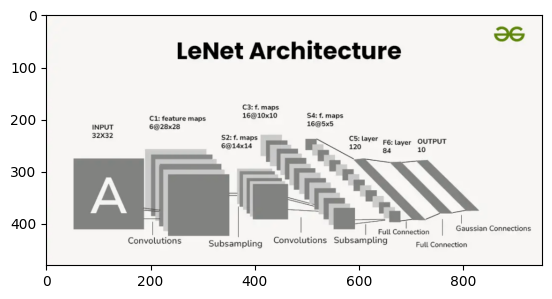

In [38]:
img=cv2.imread("lenet-min.png")
plt.imshow(img)

In [23]:
input_layer=tf.keras.layers.Input(shape=(32,32,1))
conv1=tf.keras.layers.Conv2D(filters=6,strides=(1,1),kernel_size=(5,5), activation='relu')
pooling1=tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))
conv2=tf.keras.layers.Conv2D(filters=6,strides=(1,1),kernel_size=(5,5), activation='relu')
pooling2=tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))
dence1=tf.keras.layers.Dense(units=120, activation='relu')
flat=tf.keras.layers.Flatten()
dence2=tf.keras.layers.Dense(units=84, activation='relu')
output=tf.keras.layers.Dense(units=10,activation='softmax')

In [24]:
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(input_layer)
model.add(conv1)
model.add(pooling1)
model.add(conv2)
model.add(pooling2)
#model.add(flat)
model.add(dence1)
model.add(flat)
model.add(dence2)
model.add(output)

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history=model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8243 - loss: 0.3983 - val_accuracy: 0.5400 - val_loss: 0.8942
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8197 - loss: 0.3689 - val_accuracy: 0.5200 - val_loss: 0.9277
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8740 - loss: 0.3287 - val_accuracy: 0.5300 - val_loss: 0.9807
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8841 - loss: 0.2774 - val_accuracy: 0.5200 - val_loss: 1.0963
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8970 - loss: 0.2647 - val_accuracy: 0.5000 - val_loss: 1.1502
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9074 - loss: 0.2467 - val_accuracy: 0.5000 - val_loss: 1.0651
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9285 - loss: 0.2035 - val_accuracy: 0.4700 - val_loss: 1.2731
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9137 - loss: 0.2235 - val_accuracy: 0.5600 - v

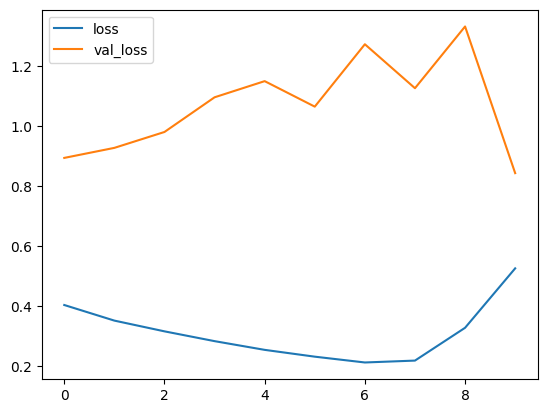

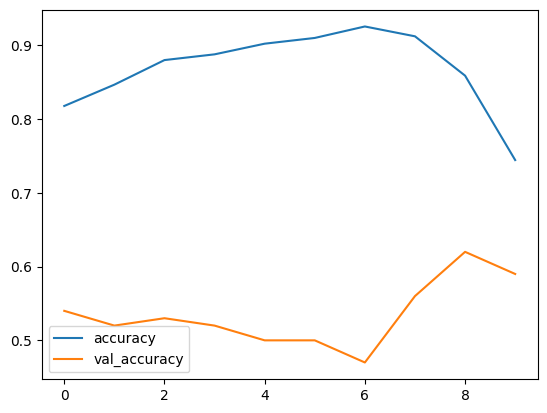

In [30]:
import pandas as pd
#model _evaluation:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
cats_set


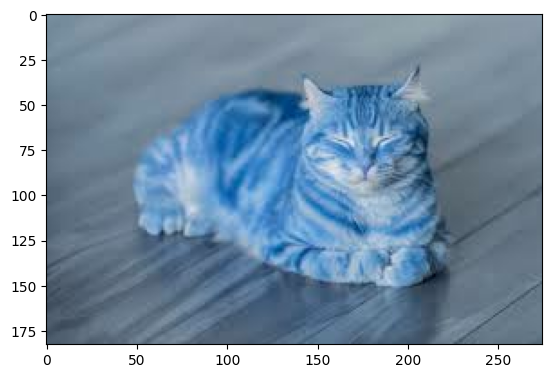

In [39]:
img = cv2.imread("cat.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(gray_img, (32, 32))
test_img = np.expand_dims(test_img, axis=-1)
test_img = np.expand_dims(test_img, axis=0)

pred = model.predict(test_img)
class_names = train_data.class_names
plt.imshow(img)
print(class_names[np.argmax(pred)])
